In [74]:
from unittest import skipIf
from winreg import SaveKey

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('../../DATA/gene_expression.csv')

In [76]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

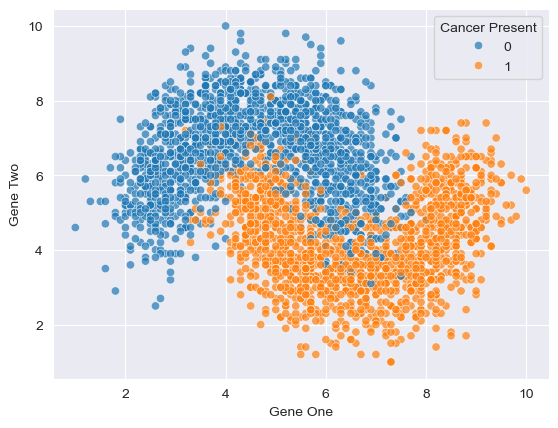

In [77]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

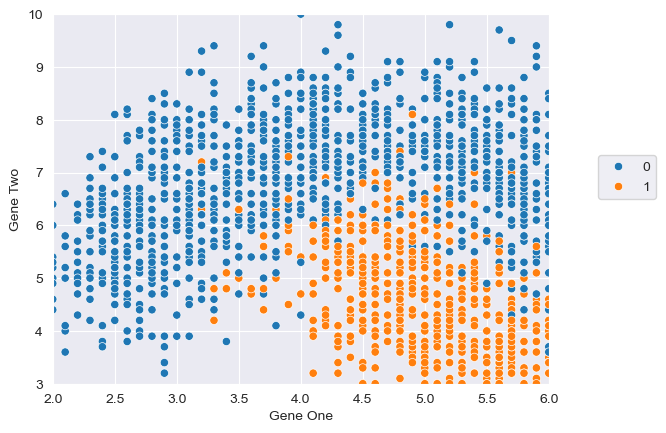

In [78]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaled_X_train = scaler.fit_transform(X_train)

In [85]:
scaled_X_test = scaler.fit_transform(X_test)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [88]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [89]:
full_test = pd.concat([X_test,y_test],axis=1)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

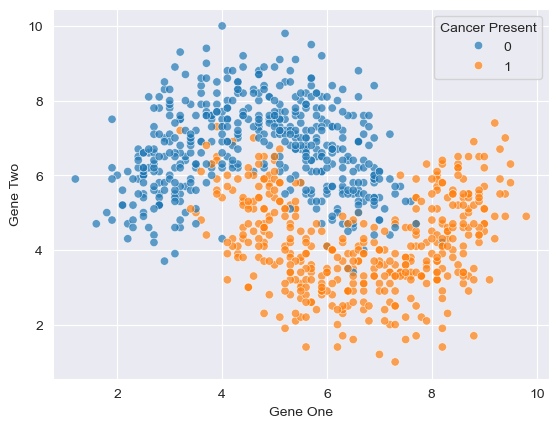

In [90]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

In [91]:
y_pred = knn_model.predict(scaled_X_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [93]:
accuracy_score(y_test, y_pred)

0.9133333333333333

In [94]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



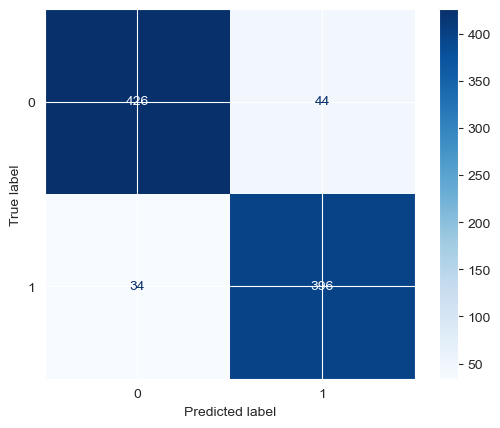

In [96]:
ConfusionMatrixDisplay(confusion_matrix).plot(cmap='Blues')

In [97]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

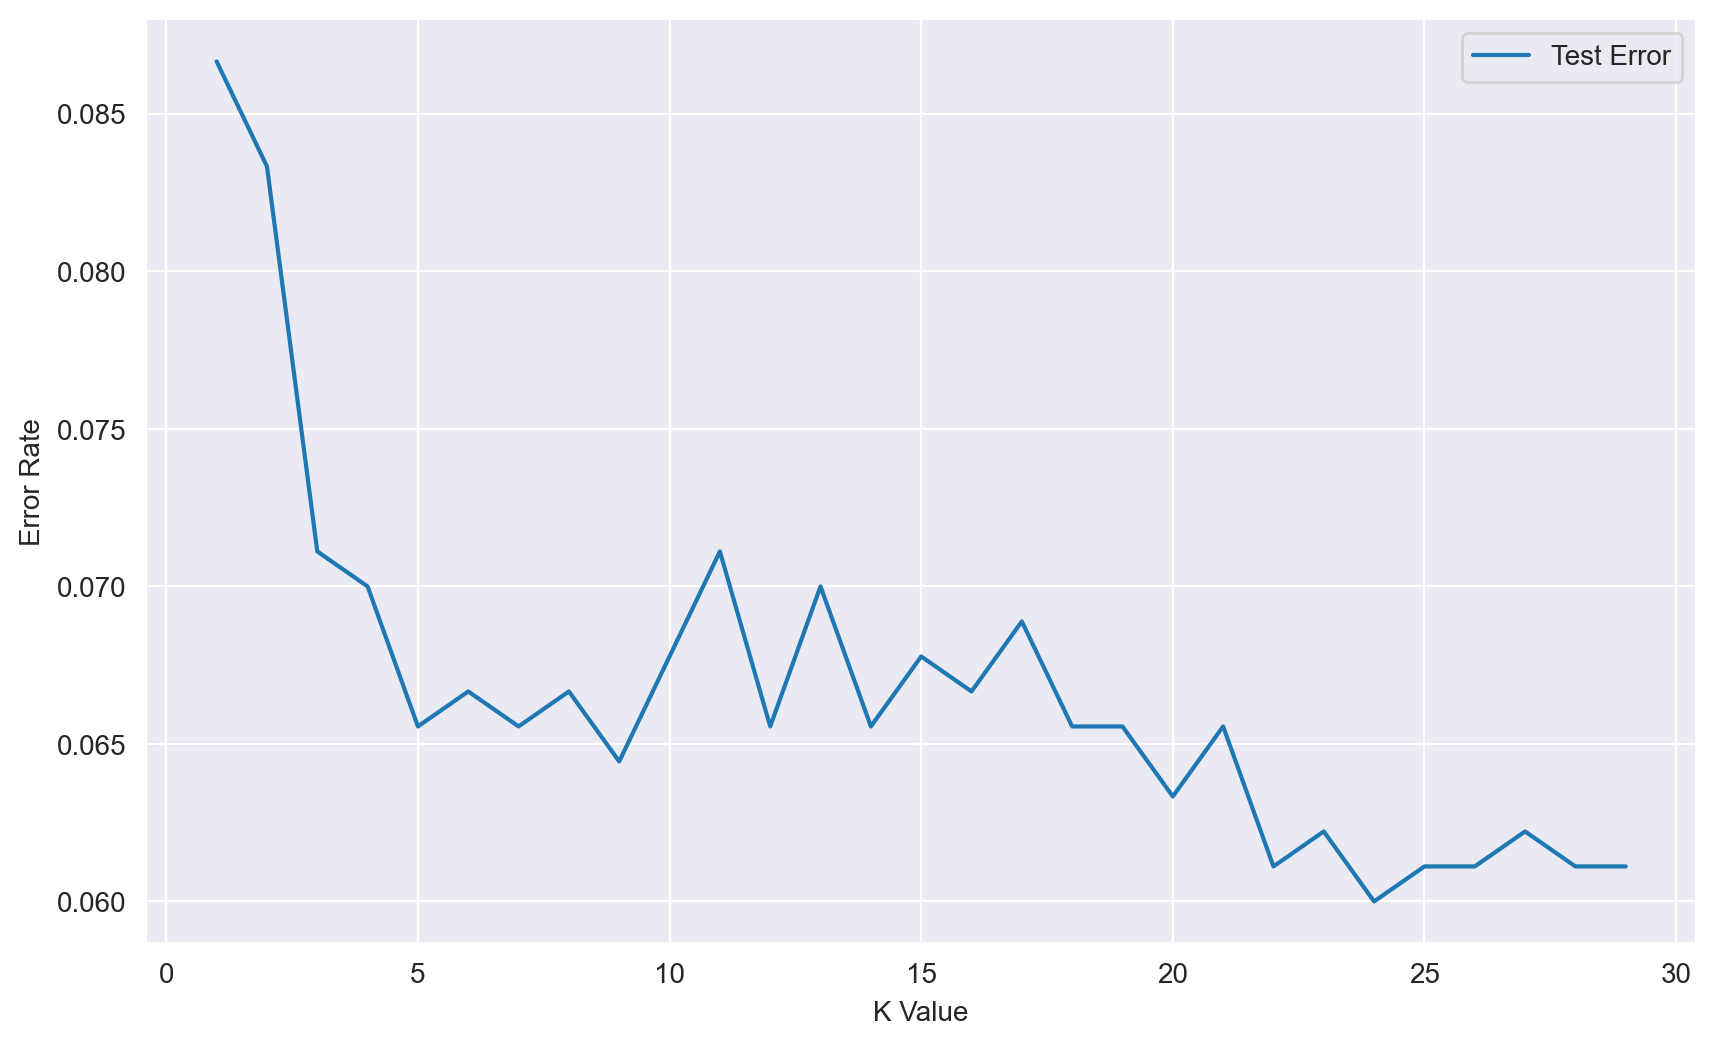

In [98]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [99]:
scaler = StandardScaler()

In [100]:
knn = KNeighborsClassifier()

In [101]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [102]:
operations = [('scaler', scaler), ('knn', knn)]

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
pipe = Pipeline(operations)

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
k_values = list(range(1, 30))

In [107]:
param_grid = {
    'knn__n_neighbors': k_values
}

In [108]:
full_cv_classifier = GridSearchCV(estimator=pipe, param_grid=param_grid,cv=5,scoring='accuracy', n_jobs=-1)

In [109]:
full_cv_classifier.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [110]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [111]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [112]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90761905, 0.92047619, 0.91285714, 0.92428571,
       0.92142857, 0.92761905, 0.9247619 , 0.9247619 , 0.92238095,
       0.92428571, 0.92571429, 0.92809524, 0.92857143, 0.92857143,
       0.93047619, 0.92857143, 0.92904762, 0.92809524, 0.93142857,
       0.92761905, 0.93095238, 0.92761905, 0.92761905, 0.92761905,
       0.92714286, 0.92857143, 0.92857143, 0.92904762])

In [113]:
len(full_cv_classifier.cv_results_['mean_test_score'])

29

In [120]:
scaler = StandardScaler()

In [121]:
knn20 = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)

In [122]:
operations = [('scaler', scaler), ('knn20', knn20)]

In [123]:
pipe = Pipeline(operations)

In [125]:
pipe.fit(scaled_X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn20', KNeighborsClassifier(n_jobs=-1, n_neighbors=20))])

In [127]:
pipe_pred = pipe.predict(scaled_X_test)

In [128]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       470
           1       0.93      0.93      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [129]:
single_sample = X_test.iloc[40]

In [130]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [131]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0], dtype=int64)

In [132]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.7, 0.3]])